#### 1-Preparing The Data For Analysis

## Examining the dataset
**INSTRUCTIONS**

*   Import pandas using the alias ``pd``.
*   Read the file police.csv into a DataFrame named ``ri``
*   Examine the first 5 rows of the ``DataFrame`` (known as the ``"head"``).
*   Count the number of missing values in each column: Use ``.isnull()`` to check which ``DataFrame`` elements are missing, and then take the ``.sum()`` to count the number of ``True`` values in each column.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Mustafa\\Desktop\\MyWorkSpace\\Github_Data_Science\\10_Medium_sized_projects\\Proje1'

In [3]:
# ri = pd.read_csv("police.csv", delimiter = ";")
ri = pd.read_csv("police.csv", sep = ",")

C:\Users\Mustafa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
ri.head(5)

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [5]:
ri.shape

(509681, 26)

In [6]:
# ri=ri.iloc[1:50000] # iloc indexlerle calisir ilk 50 binlik satirla calisiyoruz.

In [7]:
len(ri.head())

5

In [8]:
ri.isnull().sum() # ri ‘deki eksik değerlerin sayısını öğrenelim 

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [9]:
ri.isnull().sum().sort_values(ascending=False) # df ‘deki eksik değerlerin sayısını öğrenelim ve azalan şekilde sıralayalım.

county_name              509681
county_fips              509681
fine_grained_location    509681
search_type              491919
search_type_raw          491919
driver_age                30695
out_of_state              29881
driver_gender             29097
violation_raw             29073
driver_race               29073
driver_race_raw           29073
stop_outcome              29073
is_arrested               29073
stop_duration             29073
violation                 29073
driver_age_raw            29049
stop_time                    10
search_conducted             10
stop_date                    10
police_department            10
state                         0
district                      0
location_raw                  0
drugs_related_stop            0
contraband_found              0
id                            0
dtype: int64

In [10]:
ri.shape

(509681, 26)

## Dropping columns
Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the ``DataFrame``, to make it easier for you to focus on the remaining columns.

You'll drop the ``county_name`` column because it only contains missing values, and you'll drop the ``state`` column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

**INSTRUCTIONS**

*   Examine the ``DataFrame``'s shape to find out the number of rows and columns.

*   Drop the columns that almost consist of missing values. 

*   Examine the ``.shape`` again to verify that there are now two fewer columns.

In [11]:
# ri.drop(["state", "county_name"], axis = 1)
ri.drop(["state", "county_name"], axis = 1, inplace = True) # I droped this two colomns (degikleri kayd edecek sekilde sildik)
ri

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,2005-01-04,11:30,Zone X1,NaN,NaN,0,NaN,NaN,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,27.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509676,RI-NA-06,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509677,RI-NA-07,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509678,RI-NA-08,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509679,RI-NA-09,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA


In [12]:
ri.shape # iki kolon kalici sekilde silindi

(509681, 24)

In [13]:
ri.drop(["county_fips", "fine_grained_location"], axis = 1, inplace = True) # bu kolonlarda tum veri eksik oldugundan siliyorum

In [14]:
ri.shape

(509681, 22)

## Dropping rows
When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the ``driver_gender`` column will be critical to many of your analyses. Because only a small fraction of rows are missing ``driver_gender``, we'll drop those rows from the dataset.

**INSTRUCTIONS**

*   Count the number of missing values in each column.

*   Drop all rows that are missing ``driver_gender`` by passing the column name to the subset parameter of ``.dropna()``.
*   Count the number of missing values in each column again, to verify that none of the remaining rows are missing ``driver_gender``.
*   Examine the ``DataFrame``'s ``.shape`` to see how many rows and columns remain.

In [15]:
print(ri.isnull().sum().sort_values(ascending=False))

search_type           491919
search_type_raw       491919
driver_age             30695
out_of_state           29881
driver_gender          29097
violation_raw          29073
driver_race_raw        29073
stop_duration          29073
is_arrested            29073
stop_outcome           29073
violation              29073
driver_race            29073
driver_age_raw         29049
search_conducted          10
stop_time                 10
stop_date                 10
police_department         10
location_raw               0
district                   0
drugs_related_stop         0
contraband_found           0
id                         0
dtype: int64


In [16]:
# ri.dropna() # her hangi bir index te satirda herhangi bir kolan altinda 
# bir tane bile NaN var ise o satiri dusuruyor, #bu direkt NaN bulunan İndex'i düşürür

In [17]:
ri.dropna(subset=['driver_gender'], inplace=True) # Sıra sayımız 50 binden 48 bine düştü
                                                # Our number of rows decreased from 50 thousand to 48 thousand
                                                # 'driver_gender' kolonu altinda NaN olan satirlari sildi
                                                # 'driver_gender' kolonu alti tamamen dolu verilerden olusuyor
ri
# ri.dropna(subset=['driver_gender'])

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509666,RI-2015-47061,2015-12-31,22:46,Zone X1,0,M,1959.0,56.0,H,Hispanic,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X1
509667,RI-2015-47062,2015-12-31,22:47,Zone X4,500,M,1988.0,27.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
509668,RI-2015-47063,2015-12-31,23:08,Zone X3,200,M,1980.0,35.0,H,Hispanic,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3
509669,RI-2015-47064,2015-12-31,23:44,Zone K2,900,M,1984.0,31.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2


In [18]:
ri.isnull().sum().sort_values(ascending=False)

search_type           462822
search_type_raw       462822
driver_age              1638
out_of_state             808
driver_age_raw             1
district                   0
driver_race_raw            0
stop_date                  0
stop_time                  0
location_raw               0
police_department          0
driver_gender              0
violation_raw              0
driver_race                0
drugs_related_stop         0
violation                  0
search_conducted           0
contraband_found           0
stop_outcome               0
is_arrested                0
stop_duration              0
id                         0
dtype: int64

In [19]:
ri.shape

(480584, 22)

In [20]:
ri["driver_gender"].value_counts() # Her bir değerin sütunda bulunma sayısına bakalım.
                                # Let's look at the number of times each value is in the column.

M    349446
F    131138
Name: driver_gender, dtype: int64

## Fixing a data type
We know that the ``is_arrested`` column currently has the ``object`` data type. In this exercise, we'll change the data type to ``bool``, which is the most suitable type for a column containing ``True`` and ``False`` values.

Fixing the data type will enable us to use mathematical operations on the ``is_arrested`` column that would not be possible otherwise.

**INSTRUCTIONS**

*   Examine the head of the ``is_arrested`` column to verify that it contains ``True`` and ``False`` values.
*   Check the current data type of ``is_arrested``.
*   Use the ``.astype()`` method to convert ``is_arrested`` to a ``bool`` column.
*   Check the new data type of ``is_arrested``, to confirm that it is now a ``bool`` column.

In [21]:
ri.is_arrested.head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

In [22]:
ri['is_arrested'] = ri.is_arrested.astype(bool)

In [23]:
print(ri.is_arrested.dtype)

bool


In [24]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480584 entries, 0 to 509670
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  480584 non-null  object 
 1   stop_date           480584 non-null  object 
 2   stop_time           480584 non-null  object 
 3   location_raw        480584 non-null  object 
 4   police_department   480584 non-null  object 
 5   driver_gender       480584 non-null  object 
 6   driver_age_raw      480583 non-null  float64
 7   driver_age          478946 non-null  float64
 8   driver_race_raw     480584 non-null  object 
 9   driver_race         480584 non-null  object 
 10  violation_raw       480584 non-null  object 
 11  violation           480584 non-null  object 
 12  search_conducted    480584 non-null  object 
 13  search_type_raw     17762 non-null   object 
 14  search_type         17762 non-null   object 
 15  contraband_found    480584 non-nul

## Combining object columns

Currently, the date and time of each traffic stop are stored in separate object columns: ``stop_date`` and ``stop_time``.

You'll combine these two columns into a single column, and then convert it to ``datetime`` format. This will enable convenient date-based attributes that we'll use later in the course.

**INSTRUCTIONS**

*    Use a string method to concatenate ``stop_date`` and ``stop_time`` (separated by a space), and store the result in ``combined``.
*    Convert ``combined`` to ``datetime`` format, and store the result in a new column named ``stop_datetime``.
*    Examine the ``DataFrame`` ``.dtypes`` to confirm that ``stop_datetime`` is a datetime column.


In [25]:
combined = ri.stop_date.str.cat(ri.stop_time, sep= ' ') # Concatenate 'stop_date' and 'stop_time' (separated by a space)

In [26]:
ri['stop_datetime'] = pd.to_datetime(combined) # # Convert 'combined' to datetime format

In [27]:
print(ri.dtypes)

id                            object
stop_date                     object
stop_time                     object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted              object
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [28]:
pd.DataFrame(ri)

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509666,RI-2015-47061,2015-12-31,22:46,Zone X1,0,M,1959.0,56.0,H,Hispanic,...,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X1,2015-12-31 22:46:00
509667,RI-2015-47062,2015-12-31,22:47,Zone X4,500,M,1988.0,27.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2015-12-31 22:47:00
509668,RI-2015-47063,2015-12-31,23:08,Zone X3,200,M,1980.0,35.0,H,Hispanic,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3,2015-12-31 23:08:00
509669,RI-2015-47064,2015-12-31,23:44,Zone K2,900,M,1984.0,31.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2015-12-31 23:44:00


The last step that you'll take in this chapter is to set the ``stop_datetime`` column as the ``DataFrame``'s index. By replacing the default index with a ``DatetimeIndex``, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course.

**INSTRUCTIONS**

*   Set ``stop_datetime`` as the ``DataFrame`` index.
*   Examine the index to verify that it is a ``DatetimeIndex``.
*   Examine the ``DataFrame`` columns to confirm that ``stop_datetime`` is no longer one of the columns.


In [29]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [30]:
print(ri.index) # # Examine the index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)


In [31]:
print(ri.columns) # Examine the columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')


In [32]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [33]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480584 entries, 2005-01-02 01:55:00 to 2015-12-31 23:48:00
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  480584 non-null  object 
 1   stop_date           480584 non-null  object 
 2   stop_time           480584 non-null  object 
 3   location_raw        480584 non-null  object 
 4   police_department   480584 non-null  object 
 5   driver_gender       480584 non-null  object 
 6   driver_age_raw      480583 non-null  float64
 7   driver_age          478946 non-null  float64
 8   driver_race_raw     480584 non-null  object 
 9   driver_race         480584 non-null  object 
 10  violation_raw       480584 non-null  object 
 11  violation           480584 non-null  object 
 12  search_conducted    480584 non-null  object 
 13  search_type_raw     17762 non-null   object 
 14  search_type         17762 non-null   object 
 15  

In [34]:
ri.describe()

,driver_age_raw,driver_age
count,480583.000000,478946.000000
mean,1970.542156,33.981812
std,107.900717,12.702774
min,0.000000,15.000000
25%,1967.000000,23.000000
50%,1980.000000,31.000000
75%,1987.000000,43.000000
max,8801.000000,99.000000


In [35]:
pd.DataFrame(ri)

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:46:00,RI-2015-47061,2015-12-31,22:46,Zone X1,0,M,1959.0,56.0,H,Hispanic,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X1
2015-12-31 22:47:00,RI-2015-47062,2015-12-31,22:47,Zone X4,500,M,1988.0,27.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2015-12-31 23:08:00,RI-2015-47063,2015-12-31,23:08,Zone X3,200,M,1980.0,35.0,H,Hispanic,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3


In [36]:
ri.isnull()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2005-01-02 20:30:00,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2005-01-04 12:55:00,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2005-01-06 01:30:00,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2005-01-12 08:05:00,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:46:00,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2015-12-31 22:47:00,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2015-12-31 23:08:00,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


In [37]:
ri.isnull().sum()

id                         0
stop_date                  0
stop_time                  0
location_raw               0
police_department          0
driver_gender              0
driver_age_raw             1
driver_age              1638
driver_race_raw            0
driver_race                0
violation_raw              0
violation                  0
search_conducted           0
search_type_raw       462822
search_type           462822
contraband_found           0
stop_outcome               0
is_arrested                0
stop_duration              0
out_of_state             808
drugs_related_stop         0
district                   0
dtype: int64

In [38]:
columns = ri.columns
columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')

In [39]:
ri.to_csv('police1.csv',  index=False)

In [40]:
ri

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:46:00,RI-2015-47061,2015-12-31,22:46,Zone X1,0,M,1959.0,56.0,H,Hispanic,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X1
2015-12-31 22:47:00,RI-2015-47062,2015-12-31,22:47,Zone X4,500,M,1988.0,27.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2015-12-31 23:08:00,RI-2015-47063,2015-12-31,23:08,Zone X3,200,M,1980.0,35.0,H,Hispanic,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3


In [41]:
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


In [42]:
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

In [43]:
annual_drug_rate

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

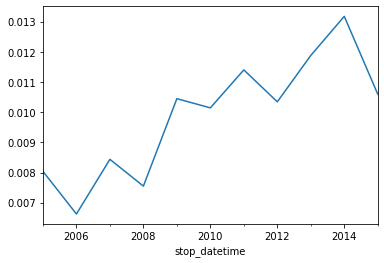

In [44]:
annual_drug_rate.plot()